In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import re

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
url = 'https://www.co.marathon.wi.us/Departments/CountyClerk/Elections/Results.aspx?report=2'

In [3]:
headers = {'User-Agent': "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 "
           "(KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36"}
r = requests.get(url, headers=headers)

In [11]:
p = re.compile(r'(?<=Donald J. Trump \/ \(REP\).  .  .  .  .  .  .)\s+\d+(?=\s)')

In [12]:
donald_votes = p.findall(r.text)

In [13]:
len(donald_votes)

109

In [14]:
p2 = re.compile(r'(?<=Joseph R\. Biden \/ \(DEM\).  .  .  .  .  .  .)\s+\d+(?=\s)')

In [15]:
biden_votes = p2.findall(r.text)

In [16]:
len(biden_votes)

109

In [21]:
p3 = re.compile(r'(?<=Don Blankenship \/ \(CON\).  .  .  .  .  .  .)\s+\d+(?=\s)')

In [22]:
don_votes = p3.findall(r.text)

In [23]:
len(don_votes)

109

In [24]:
p4 = re.compile(r'(?<=Jo Jorgensen \/ \(LIB\).  .  .  .  .  .  .  .)\s+\d+(?=\s)')

In [25]:
jo_votes = p4.findall(r.text)

In [27]:
len(jo_votes)

109

In [28]:
wards_dict = {'Donald Trump':donald_votes, 'Joseph Biden':biden_votes, 'Don Blankenship': don_votes, 'Jo Jorgensen':jo_votes}

In [30]:
votes_data = pd.DataFrame(wards_dict)

In [31]:
votes_data.head()

,Donald Trump,Joseph Biden,Don Blankenship,Jo Jorgensen
0,317,182,1,7
1,437,167,0,3
2,185,67,1,1
3,445,258,2,4
4,235,50,0,1


In [32]:
# convert to int
votes_data['Donald Trump'] = votes_data['Donald Trump'].astype(int)
votes_data['Joseph Biden'] = votes_data['Joseph Biden'].astype(int)
votes_data['Don Blankenship'] = votes_data['Don Blankenship'].astype(int)
votes_data['Jo Jorgensen'] = votes_data['Jo Jorgensen'].astype(int)


Text(0.5, 0.98, 'Marathon County')

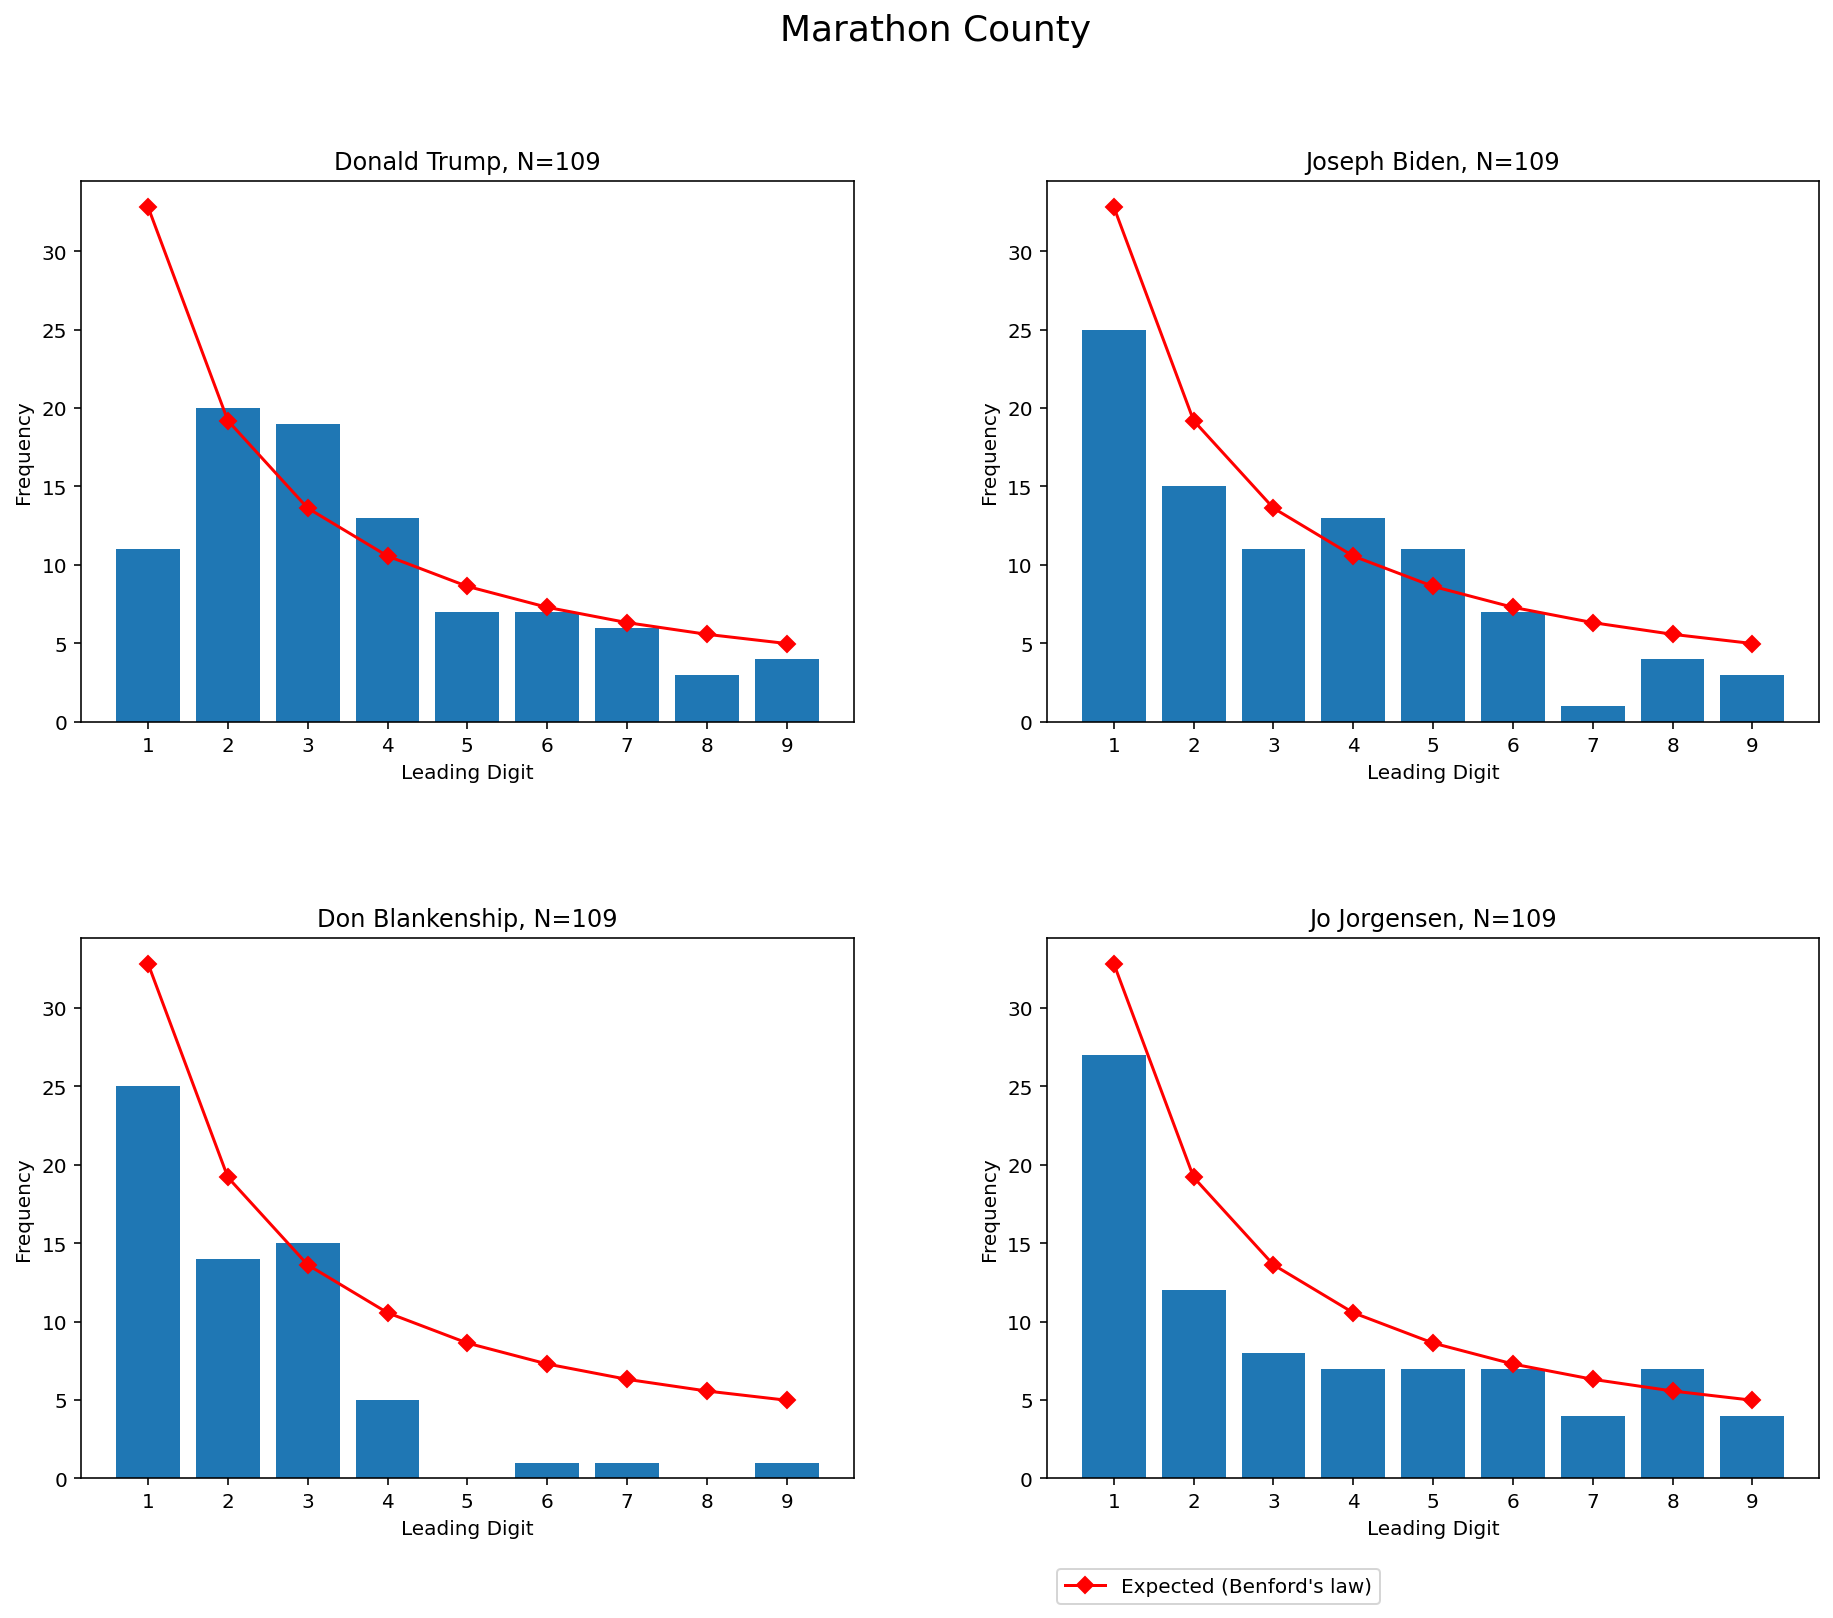

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])
plt.subplots_adjust(hspace=0.4, wspace=0.25)
    
axs = np.array(axs).flatten()
candidates = list(votes_data.columns)

# benford's law
digit = np.arange(1, 10)

for i in range(len(axs)):

    ax = axs[i]
    candidate = candidates[i]
    
    N = 109
    expected = np.log10(1 + 1/digit)*N
    
    digits = votes_data[candidate].astype(str).str[0].astype(int)
    digits = digits[digits > 0]
    
    v = digits.value_counts()
    ax.bar(v.index, v.values)
    ax.set_xticks(range(1, 10))
    
    ax.plot(digit, expected, marker='D', color='red', label='Expected (Benford\'s law)')
    
    ax.set_title("%s, N=%d" % (candidate, N))
    ax.set_xlabel("Leading Digit")
    ax.set_ylabel("Frequency")

plt.legend(loc=3, bbox_to_anchor=(0.0, -0.25))
plt.suptitle("Marathon County", fontsize=18)
    